## Save and load a Keras model

In [1]:
import numpy
%matplotlib inline
import matplotlib.pyplot as plt

from keras.utils import np_utils
from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D

from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [0]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [3]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 4s 0us/step


In [0]:
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [0]:
# normalize inputs from 0-255 to 0-1
X_train = np_utils.normalize(X_train, axis=1)
X_test = np_utils.normalize(X_test, axis=1)

In [0]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

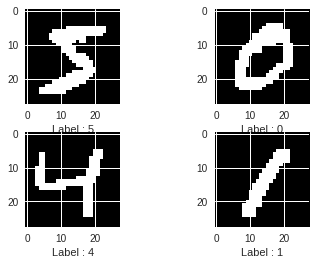

In [7]:
def plot_images(images, labels):
  # Create figure with 2x2 sub-plots.
  fig, axes = plt.subplots(2, 2)
  fig.subplots_adjust(hspace=0.3, wspace=0.3)

  # plot 4 images
  for i, ax in enumerate(axes.flat):
    # Plot image
    ax.imshow(images[i].reshape([28,28]), cmap=plt.get_cmap('gray'))
    
    # Plot label
    for idx, val in enumerate(labels[i]):
      if(val == 1):
        ax.set_xlabel('Label : %d' % idx)
        
  plt.show()
  
plot_images(X_train[0:4], y_train[0:4])

In [0]:
def plot_history(history,name,metric):
    label_val = 'val_%s' % metric
    
    train = history.history[metric]
    test  = history.history[label_val]

    # Create count of the number of epochs
    epoch_count = range(1, len(train) + 1)

    # Visualize loss history
    plt.plot(epoch_count, train, 'r-')
    plt.plot(epoch_count, test, 'b--')
    plt.legend(['Train', 'Test'])
    plt.xlabel('Epoch')
    plt.ylabel(metric)

    plt.title('%s : %s' % (metric,name))

    plt.show()

In [0]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=1,
                   verbose=1,
                   mode='auto')

In [0]:
def baseline_model(num_filters, num_units):
  # create model
  model = Sequential()
  
  model.add(Convolution2D(num_filters, (3, 3), activation='relu', input_shape=(1,28,28), data_format='channels_first'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))
  
  model.add(Flatten())
  model.add(Dense(num_units, activation='relu'))

  model.add(Dense(num_classes, activation='softmax'))
  
  # Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

test_filters_16_units_32
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 104s 2ms/step - loss: 0.2921 - acc: 0.9107 - val_loss: 0.1447 - val_acc: 0.9571
Epoch 2/100
60000/60000 [==============================] - 101s 2ms/step - loss: 0.1371 - acc: 0.9577 - val_loss: 0.1008 - val_acc: 0.9693
Epoch 3/100
60000/60000 [==============================] - 100s 2ms/step - loss: 0.1024 - acc: 0.9680 - val_loss: 0.0867 - val_acc: 0.9738
Epoch 4/100
60000/60000 [==============================] - 102s 2ms/step - loss: 0.0822 - acc: 0.9746 - val_loss: 0.0805 - val_acc: 0.9742
Epoch 5/100
60000/60000 [==============================] - 101s 2ms/step - loss: 0.0689 - acc: 0.9774 - val_loss: 0.0782 - val_acc: 0.9743
Epoch 6/100
60000/60000 [==============================] - 101s 2ms/step - loss: 0.0597 - acc: 0.9803 - val_loss: 0.0744 - val_acc: 0.9783
Epoch 7/100
60000/60000 [==============================] - 101s 2ms/step - loss: 0.0529 - a

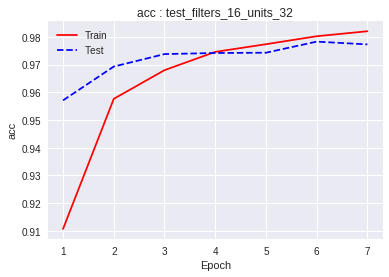

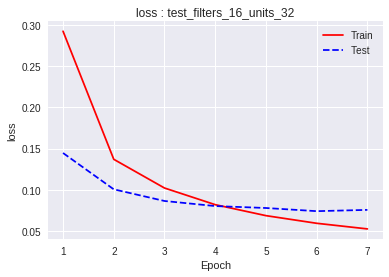

10000/10000 [==============================] - 10s 994us/step
Summary: val_loss: 0.07590725571778603, val_acc: 0.9773


In [11]:
filters = [16]
units   = [32]

for filter in filters:
    for unit in units:
      
        # Name the test model
        name = 'test_filters_{}_units_{}'.format(filter, unit)
        print(name)

        # build the model
        model = baseline_model(filter, unit)
        
        # Fit the model
        history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                  epochs=100, batch_size=32, verbose=1, callbacks=[es])
        
        # Plot the history
        plot_history(history,name,'acc')
        plot_history(history,name,'loss')
       
        # Print the summary values
        val_loss, val_acc = model.evaluate(X_test,y_test)
        
        summary = 'Summary: val_loss: {}, val_acc: {}'.format(val_loss, val_acc)
        print(summary)

In [0]:
# Save the model
model.save('mnist_model.h5')

In [0]:
# Load the model
from keras.models import load_model
loaded_model = load_model('mnist_model.h5')

In [15]:
loaded_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 26, 26)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 13, 26)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 13, 26)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2704)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                86560     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 87,050
Trainable params: 87,050
Non-trainable params: 0
_________________________________________________________________


In [16]:
loaded_model.get_weights()


[array([[[[ 1.34977857e-02, -3.16391662e-02, -8.27834368e-01,
            2.20812276e-01,  1.10244103e-01, -7.62038380e-02,
           -5.07353604e-01,  3.02781612e-02, -6.16889298e-01,
            5.52076250e-02, -2.87002504e-01, -1.52058825e-01,
            3.23039800e-01, -1.27543166e-01, -8.19418877e-02,
            1.18414700e-01]],
 
         [[ 2.01365538e-02,  3.93479541e-02, -2.70961612e-01,
            3.87300938e-01,  1.65660903e-01, -3.72337699e-02,
           -1.15225218e-01,  3.73549499e-02,  1.93667293e-01,
           -1.85809597e-01, -2.26128370e-01, -1.74681470e-02,
            2.16252029e-01, -7.92109609e-01, -1.57746568e-01,
            1.29380673e-01]],
 
         [[-1.24279179e-01,  1.54859722e-01, -4.86591101e-01,
            3.36836427e-02, -2.77989894e-01, -1.05907306e-01,
           -3.51901680e-01, -1.18619557e-02,  4.30975199e-01,
           -5.52053571e-01, -3.66133362e-01, -1.31896082e-02,
           -2.95703232e-01, -3.69133830e-01, -2.21775874e-01,
      

In [17]:
loaded_model.optimizer